# Project 2: Supervised Learning
### Building a Student Intervention System

## 1. Classification vs Regression

Your goal is to identify students who might need early intervention - which type of supervised machine learning problem is this, classification or regression? Why?

The problem is one of classification because the target (graduation yes/no) is binary or more generally is a categorical variable. 

## 2. Exploring the Data

Let's go ahead and read in the student dataset first.

_To execute a code cell, click inside it and press **Shift+Enter**._

In [1]:
# Import libraries
import numpy as np
import pandas as pd

In [2]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!


Now, can you find out the following facts about the dataset?
- Total number of students
- Number of students who passed
- Number of students who failed
- Graduation rate of the class (%)
- Number of features

_Use the code block below to compute these values. Instructions/steps are marked using **TODO**s._

In [3]:
# TODO: Compute desired values - replace each '?' with an appropriate expression/function call
nO, nF = student_data.shape
col_nm = student_data.columns.tolist()
pss = student_data[col_nm[-1]]

isPass = np.array(pss=='yes')
nPass = sum(isPass==True)
nFail = sum(isPass==False)
grad = float(nPass) / float(nO)

n_students = nO
n_features = nF-1 # snafu: thanks, last column is the target ...
n_passed = nPass
n_failed = nFail
grad_rate = grad*100
print "Total number of students: {}".format(n_students)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Number of features: {}".format(n_features)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of students who passed: 265
Number of students who failed: 130
Number of features: 30
Graduation rate of the class: 67.09%


## 3. Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Let's first separate our data into feature and target columns, and see if any features are non-numeric.<br/>
**Note**: For this dataset, the last column (`'passed'`) is the target or label we are trying to predict.

In [4]:
# Extract feature (X) and target (y) columns
feature_cols = list(student_data.columns[:-1])  # all columns but last are features
target_col = student_data.columns[-1]           # last column is the target/label
print "Feature column(s):-\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

X_org = student_data[feature_cols]  # feature values for all students
y_org = student_data[target_col]    # corresponding targets/labels
print "\n\nFeature values:-"
print X_org.head()  # print the first 5 rows

Feature column(s):-
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed


Feature values:-
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...  

### Preprocess feature columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation.

In [5]:
# Preprocess feature columns
def preprocess_features(X):
    outX = pd.DataFrame(index=X.index)  # output dataframe, initially empty

    # Check each column
    for col, col_data in X.iteritems():
        # If data type is non-numeric, try to replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        # Note: This should change the data type for yes/no columns to int

        # If still non-numeric, convert to one or more dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)  # e.g. 'school' => 'school_GP', 'school_MS'

        outX = outX.join(col_data)  # collect column(s) in output dataframe

    return outX

X_org_aug = preprocess_features(X_org)
print "Processed feature columns ({}):-\n{}".format(len(X_org_aug.columns), list(X_org_aug.columns))

Processed feature columns (48):-
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Split data into training and test sets

So far, we have converted all _categorical_ features into numeric values. In this next step, we split the data (both features and corresponding labels) into training and test sets.

Training set: 300 samples
Test set: 95 samples


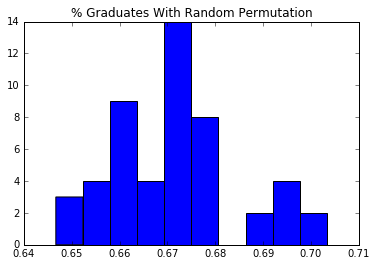

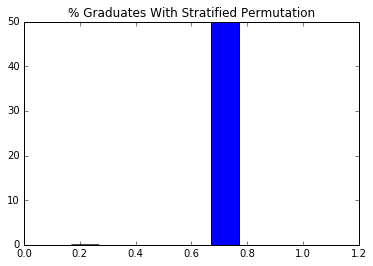

In [6]:
# First, decide how many training vs test samples you want
num_all = student_data.shape[0]  # same as len(student_data)
num_train = 300  # about 75% of the data
num_test = num_all - num_train

# TODO: Then, select features (X) and corresponding labels (y) for the training and test sets
# Note: Shuffle the data or randomly select samples to avoid any bias due to ordering in the dataset
from sklearn.utils import shuffle
ixs = shuffle(X_org_aug.index, random_state=0)

# Revision feedback: compare random sampleing with stratified sampling
from sklearn.cross_validation import StratifiedShuffleSplit

nS = 50
grd_rand = np.zeros([nS,1])
grd_strf = np.zeros([nS,1])
y_tgt = y_org.replace(['yes', 'no'],[1, 0])
for i in range(50):
    ixs_tmp = shuffle(X_org_aug.index, random_state=i)
    grd_rand[i] = float(sum(y_tgt[ixs_tmp[:num_train]]==1)) / num_train
    
    strf = StratifiedShuffleSplit(y_tgt, 1, test_size=num_test, random_state=i)
    for train_index, test_index in strf:
        _ = False
    
    grd_strf[i] = float(sum(y_tgt[train_index]==1)) / len(train_index)

# Make matplotlib show our plots inline (nicely formatted in the notebook)
import matplotlib.pyplot as pl
%matplotlib inline

fig = pl.figure(1)
ax1 = fig.add_subplot(111)
_ = ax1.hist(grd_rand)
ax1.set_title('% Graduates With Random Permutation')
fig = pl.figure(2)
ax2 = fig.add_subplot(111)
_ = ax2.hist(grd_strf)
ax2.set_title('% Graduates With Stratified Permutation')
# Note: the little blip on the last histogram around 0.2 is a graphical issue
# >>>> any(grd_strf<0.67) = False

# Revise: stratified samplying "guarantees" the ratio of graduation when splitting the sample
ixs = np.concatenate((train_index, test_index))


X_tmp_aug, y_tmp = X_org_aug.reindex(ixs), y_org.reindex(ixs)

X_train, y_train = X_tmp_aug.ix[ixs[:num_train],:], y_tmp[ixs[:num_train]]
X_test, y_test = X_tmp_aug.ix[ixs[num_train:],:], y_tmp[ixs[num_train:]]

print "Training set: {} samples".format(X_train.shape[0])
print "Test set: {} samples".format(X_test.shape[0])
# Note: If you need a validation set, extract it from within training data



## 4. Training and Evaluating Models
Choose 3 supervised learning models that are available in scikit-learn, and appropriate for this problem. For each model:

- What is the theoretical O(n) time & space complexity in terms of input size?
- What are the general applications of this model? What are its strengths and weaknesses?
- Given what you know about the data so far, why did you choose this model to apply?
- Fit this model to the training data, try to predict labels (for both training and test sets), and measure the F<sub>1</sub> score. Repeat this process with different training set sizes (100, 200, 300), keeping test set constant.

Produce a table showing training time, prediction time, F<sub>1</sub> score on training set and F<sub>1</sub> score on test set, for each training set size.

Note: You need to produce 3 such tables - one for each model.


Overall review of 3 supervised learning algos

Given that the problem is one of classification (digital outcome) I will choose 3 algorithms that are more tuned to that: SVM, k-NN, and decision tree.


O(n)

- SVM is the most challenging being of O(n) ~ d * n<sup>2</sup> to d * n<sup>3</sup>
- k-NN is O(n) ~ d * n * log(n) or d * n<sup>2</sup>
- Decision tree can be reduced to log(n)


Strengths

- SVM deals well with high dimensional problems and is robust and versatile through choices of different kernel functions
- k-NN is non-parametric; it is therefore more robust and good for complex decision boundaries
- Decision tree are fast, can be visualized and are robust to outliers


Weaknesses

- SVM can be challenging if # of features is larger than # of samples (This should be a bad state of affairs in general, because the problem in under-determined: one should be able to drive the training error down to zero, if the problem has a well-defined solution)
- k-NN will not 'generalize globally': to the degree to which there is a (relatively) regular association between inputs (features) and outputs (target), e.g. well described by low polynomials, the problem has a structure that will not be majorly exploited by the k-NN, almost surely less than a regression model. The 'nearest neaighbor' part of the kNN will instead leverage local relationships. If there is a true low-complex relationship a kNN might be proner to overfit locally. In particular, and importantly, a low-complexity classifier like a polynomial regressor will do a much better job in extending beyond the range of typical data  
- Decision trees are prone to overfitting; in addition, certain problems like XOR are hard for trees


Justifying choices

The problem is certainly complex: we turned it into 48 features with a sample of size of 300. It is unlikely that the data samples the space properly. So local approximators like k-NN are probably good. SVM should be able to handle complex boundaries and decision tree can be visualized so that it might help checking our intuition (although I was not able to use pydot to do that).

I left out Naive Bayes, in part because of the conditional independence assumption. Note that the preprocessing method will convert {'yes','no'} features into {0,1}, however, other variables that also assume two values, e.g. sex = {'M','F'} are converted into 2 features, which are actually exactly 100% correlated (one is the opposite of the other). Also other variables that contain 3 values are dependent (if you have a feature 'a' \in {a_1, a_2, a_3} and know the value of a_1 (= 0 or 1), a_2 (= 0 or 1), you'll know the value of a_3).



In [7]:
# Train a model
import time

def train_classifier(clf, X_train, y_train):
    #print "Training {}...".format(clf.__class__.__name__)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    #print "Done!\nTraining time (secs): {:.3f}".format(end - start)
    return end - start

# TODO: Choose a model, import it and instantiate an object
from sklearn import svm
clf = svm.SVC()

# Fit model to training data
train_classifier(clf, X_train, y_train)  # note: using entire training set here
print clf  # you can inspect the learned model by printing it

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [8]:
# Predict on training set and compute F1 score
from sklearn.metrics import f1_score

def predict_labels(clf, features, target):
    #print "Predicting labels using {}...".format(clf.__class__.__name__)
    t_start = time.time()
    y_pred = clf.predict(features)
    t_end = time.time()
    dt = t_end - t_start
    #print "Done!\nPrediction time (secs): {:.3f}".format(dt)
    return (f1_score(target.values, y_pred, pos_label='yes'), dt)

train_f1_score, dt = predict_labels(clf, X_train, y_train)
print "F1 score for training set: {}".format(train_f1_score)

F1 score for training set: 0.851063829787


In [9]:
# Predict on test data
f1_tmp, dt_tmp = predict_labels(clf, X_test, y_test)
print "F1 score for test set: {}".format(f1_tmp)

F1 score for test set: 0.812903225806


In [10]:
# Train and predict using different training set sizes
def train_predict(clf, X_train, y_train, X_test, y_test):
    #print "------------------------------------------"
    #print "Training set size: {}".format(len(X_train))
    dt_train = train_classifier(clf, X_train, y_train)
    f1_train, dt_train_prd = predict_labels(clf, X_train, y_train)
    f1_test, dt_test_prd = predict_labels(clf, X_test, y_test)
    #print "Training time (secs): {:.3f}".format(dt_train)
    #print "F1 score for training set: {}".format(f1_train)
    #print "F1 score for test set: {}".format(f1_test)
    return (f1_train, f1_test, dt_train, dt_test_prd)

# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant

X1, y1 = X_train.ix[ixs[0:100],:], y_train[ixs[0:100]] 
X2, y2 = X_train.ix[ixs[0:200],:], y_train[ixs[0:200]] 
X3, y3 = X_train, y_train # memory inefficient, but improving legibility 
f11_train, f11_test, dt1_train, dt1_test = train_predict(clf, X1, y1, X_test, y_test)
f12_train, f12_test, dt2_train, dt2_test = train_predict(clf, X2, y2, X_test, y_test)
f13_train, f13_test, dt3_train, dt3_test = train_predict(clf, X3, y3, X_test, y_test)

from pandas import DataFrame
df_SVM = DataFrame(columns={'train', 'test', 'train time', 'test time'}, index=(100, 200, 300))
df_SVM['train'] = [f11_train, f12_train, f13_train]
df_SVM['test'] = [f11_test, f12_test, f13_test]
df_SVM['train time'] = [dt1_train, dt2_train, dt3_train]
df_SVM['test time'] = [dt1_test, dt2_test, dt3_test]
df_SVM = df_SVM[['train', 'test', 'train time', 'test time']]


from IPython.display import display, HTML
print "SVM"
display(df_SVM)


SVM


,train,test,train time,test time
100,0.860759,0.815287,0.016,0
200,0.867314,0.825806,0.000,0
300,0.851064,0.812903,0.016,0


In [11]:
# TODO: Train and predict using two other models
# Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree')

f11_train, f11_test, dt1_train, dt1_test = train_predict(clf, X1, y1, X_test, y_test)
f12_train, f12_test, dt2_train, dt2_test = train_predict(clf, X2, y2, X_test, y_test)
f13_train, f13_test, dt3_train, dt3_test = train_predict(clf, X3, y3, X_test, y_test)

df_kNN = DataFrame(columns={'train', 'test', 'train time', 'test time'}, index=(100, 200, 300))
df_kNN['train'] = [f11_train, f12_train, f13_train]
df_kNN['test'] = [f11_test, f12_test, f13_test]
df_kNN['train time'] = [dt1_train, dt2_train, dt3_train]
df_kNN['test time'] = [dt1_test, dt2_test, dt3_test]
df_kNN = df_kNN[['train', 'test', 'train time', 'test time']]



# Decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)

f11_train, f11_test, dt1_train, dt1_test = train_predict(clf, X1, y1, X_test, y_test)
f12_train, f12_test, dt2_train, dt2_test = train_predict(clf, X2, y2, X_test, y_test)
f13_train, f13_test, dt3_train, dt3_test = train_predict(clf, X3, y3, X_test, y_test)

df_DT = DataFrame(columns={'train', 'test', 'train time', 'test time'}, index=(100, 200, 300))
df_DT['train'] = [f11_train, f12_train, f13_train]
df_DT['test'] = [f11_test, f12_test, f13_test]
df_DT['train time'] = [dt1_train, dt2_train, dt3_train]
df_DT['test time'] = [dt1_test, dt2_test, dt3_test]
df_DT = df_DT[['train', 'test', 'train time', 'test time']]


df_descr = DataFrame({'Parameter': ['C', 'n_neighbors', 'max_depth'], 'Value': [1.0, 3, 3]}, index=('SVM', 'kNN', 'DT'))
print "\nSummary Paramaters of Classifiers"
display(df_descr)

print "\n\n"

print "SVM"
display(df_SVM)
print "\n"

print "kNN"
display(df_kNN)
print "\n"

print "DT"
display(df_DT)
print "\n"




Summary Paramaters of Classifiers


,Parameter,Value
SVM,C,1
kNN,n_neighbors,3
DT,max_depth,3





SVM


,train,test,train time,test time
100,0.860759,0.815287,0.016,0
200,0.867314,0.825806,0.000,0
300,0.851064,0.812903,0.016,0




kNN


,train,test,train time,test time
100,0.884354,0.785185,0.000,0.000
200,0.861111,0.833333,0.016,0.016
300,0.866511,0.791367,0.000,0.016




DT


,train,test,train time,test time
100,0.930556,0.746479,0.000,0
200,0.909747,0.778626,0.000,0
300,0.876957,0.805556,0.016,0


## 5. Choosing the Best Model

- Based on the experiments you performed earlier, in 1-2 paragraphs explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?
- In 1-2 paragraphs explain to the board of supervisors in layman's terms how the final model chosen is supposed to work (for example if you chose a Decision Tree or Support Vector Machine, how does it make a prediction).
- Fine-tune the model. Use Gridsearch with at least one important parameter tuned and with at least 3 settings. Use the entire training set for this.
- What is the model's final F<sub>1</sub> score?

Choice of algorithm

Models are compared according to:
- A perormance measure ("F<sub>1</sub>" in the above tables): that measures both how good we are in correctly identifying students who will graduates (and not misclassifying those who won't make it) as well as how good we are at finding all those that graduate (i.e. minimizing those students who we think will not graduate but actually turn out graduating
- Time to train: as the data sample increases a slow algorithm can be less desirable even if more precise


In fairness, for this problem, I have a slight bias towards the SVM because it is more of a 'camelion' in that in can range from being very rigid to being very flexible (like the amortization in a car: it is great if you can control the stiffness with the tip of your finger; it makes for a great ride in very different conditions). Given that we have so many 

That said, we can see that the performance of the 3 algorithms on the test set is fairly comparable 0.851, 0.867, and 0.877 for SVM, kNN, and DT, respectively. The decision tree is certainly the fastest, although the data set is so small that training and testing is achieved in well below 1 second for all models.

Judging solely by the results on the training set, it is comforting that it follows the intuition: the decision tree is much more prone to over-fitting evidenced by a higher performance with low data (0.93) and losing anout 5% points (0.88) with 300 data points. Even more so, this is confirmed by looking at the test data where the decision tree is the poorest for 100 datapoints and achieves only a performance of 0.73.
On the other hand, SVM is a lot more stable, both when we add data (0.86, 0.87. 0.85) as well as when we compare training data (0.85 with n=300) with test data (0.81 with n=95).
kNN's performance is somewhere in between. These results give me more confidence that SVM is able to capture enough of the essence of the problem.


On a more technical side: the adaptability of the SVM seems to come in handy given that
- The problem has a mixture of categorical and continuous variables (like age, # abscenses, etc.) and
- If it turned out that there are (continuous) drivers, e.g. absences, age, etc. an algorithm that embeds the ability of being stiffer yet not edgy might be good

As a more technical caveat, and not for the board, it might be challenging to pick a model without making broader checks. I mostly used default parameters to train the different models. There is no guarantee that the default parameter values (or any specific set of parameters) will make the algorithms directly comparable. For example, if the classifiers were regressors whereby one had polynomial functions, another exponential functions, and the third trigonometric functions, by fixing the number of degrees of freedom in each to be the same we could make them directly comparable. It does not seem to be the case in this context where algorithms are sunstantially different and there might not be an obvious intrinsic measure of 'complexity' to make them compete on an even field.


SVM

Imagine you are a ranger, it's you first day on the job, and you are assigned the following task: you need to trace a path through the forest past the meadows. The forest is almost rectangular and is surrounded by meadows. There is a twist though. In the forest there are both pines and cypresses. Your boss wants you to define a path so that when you walk through it you'll have mostly pines on your right and cypresses on your left. Boss is not in a great mood and wants you to make the path as wide as possible while still keeping those trees separate. 'Ah yeah, and please don't make it have a lot of turns, I'm old and I get cranky if I walk too much'.

You approach the forest and beginner's luck wants that you approach an edge that clearly shows pines on the right hand side and cypresses on the left. You go in between them and start marking the path. From the meadow, before entering the forest, you could only see the very first row, but now you have a good starting point. You then proceed to the second row and continue marking the path, as wide as possible, so that trees are still separated. Luck is not on your side this time and you find that there is an annoyoing cypress surrounded by pines. You remeber your boss saying that the path should be as straight as possible and as wide as possible. You decide to go ahead and leave that one cypress on the wrong side.

You go back and your boss smiles: "decent job for a rookie". Tomorrow we'll take the helicopter. By seeing the whole forest at once we'll be able to find the right balance between the entire path's location and width. And yes, we'll have to make some compromises and likely leave some trees on the wrong side, but all in all visitors will get the split experience of pines on your right eye and cypresses on your left. Quite a spectacle.



I fine-tuned the SVM by optimizing over the parameter C with 3-fold CV. The optimal value is 1.04. To remain a bit truer to the spirit of out-of-sample testing I still optimized on just the training set and obtained a final F1 score of 0.81. Using the full data set the F1 score goes to 0.84.

In [12]:
# TODO: Fine-tune your model and report the best F1 score

# Gridsearch
from sklearn.metrics import make_scorer, f1_score
sc_fnc = make_scorer(f1_score, greater_is_better=True, pos_label='yes')
prm = {'C':np.linspace(0.2,4,10)}

from sklearn.grid_search import GridSearchCV
clf = svm.SVC()
clf_gs = GridSearchCV(clf,prm,scoring=sc_fnc,cv=3)
clf_gs.fit(X_train,y_train)
print clf_gs.best_estimator_
clf_gs.predict(X_test)

f1_no_cheat = f1_score(y_test.values, clf_gs.predict(X_test), pos_label='yes')
print "f1 with optimized parameter (out-of-sample) = ", f1_no_cheat

# Entire data set
clf_gs = GridSearchCV(clf,prm,scoring=sc_fnc,cv=3)
clf_gs.fit(X_org_aug,y_org)
clf_gs.best_estimator_
clf_gs.predict(X_test)

f1_cheat = f1_score(y_test.values, clf_gs.predict(X_test), pos_label='yes')
print "f1 with optimized parameter (in-sample) = ", f1_cheat





SVC(C=1.0444444444444445, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
f1 with optimized parameter (out-of-sample) =  0.812903225806
f1 with optimized parameter (in-sample) =  0.842105263158


## 6. Appendix

Trying to improve the result I looked into reducing the number of features. I used a decision tree and extracted the most relevant features (with varying degree of max_depth) which suggests: failures, absences, age, health, Mjob_services, goout, and studytime.

With a bit of a surprise the reuslts changed very little. With a gridsearch and SVM the best out-of-sample F1 comes to 0.8133, a quite minor improvement. I then tried a decision tree and I obtained very similar results.

I would interpret this as suggesting that the algorithms have done a very good job in weeding out the noise from the signal.

In the following I estimate the confidence interval of the classifiers which comes out as 0.02 for stratified sampling. Therefore the improvement is not statistically significant.

Lastly, I tried to draw the decision boundary picking two dimensions ('absences and 'age') but the data is still very mixed and the boundary will clearly depend on all the other variables too, which were either set to the average or the most popular entry in case of (1,0)'s.

Random     = 0.8000 +/- 0.0263
Stratified = 0.8048 +/- 0.0200


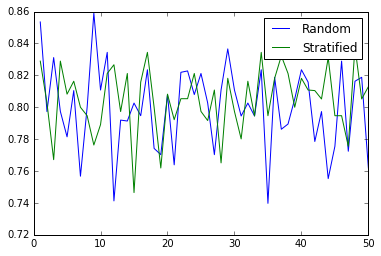

In [16]:
from sklearn.cross_validation import StratifiedShuffleSplit

nS = 50
grd_rand = np.zeros((nS, 1))
grd_strf = np.zeros((nS, 1))
data_tmp = X_org_aug
tgt_tmp = y_org.replace(['yes', 'no'], [1, 0])
Ix_trn_rnd = np.zeros((num_train, nS))
Ix_tst_rnd = np.zeros((num_test, nS))
Ix_trn_sss = np.zeros((num_train, nS))
Ix_tst_sss = np.zeros((num_test, nS))
perf_rnd = np.zeros((nS, 1))
perf_sss = np.zeros((nS, 1))

from sklearn import svm
clf = svm.SVC()

mthd = 'test'
#mthd = 'train'

for i in range(nS):
    # print "Sub-sample %i/%i" %(i+1,nS)
    
    # Random sampling
    ixs_rnd = shuffle(data_tmp.index, random_state=i)
    ix_trn_rnd, ix_tst_rnd = ixs_rnd[:num_train], ixs_rnd[num_train:]
    Ix_trn_rnd[:, i] = ix_trn_rnd
    Ix_tst_rnd[:, i] = ix_tst_rnd
    clf.fit(data_tmp.iloc[Ix_trn_rnd[:, i]], tgt_tmp[Ix_trn_rnd[:, i]])
    if mthd=='test':
        perf_rnd[i] = f1_score(tgt_tmp[Ix_tst_rnd[:, i]], clf.predict(data_tmp.iloc[Ix_tst_rnd[:, i]]))
    else:
        perf_rnd[i] = f1_score(tgt_tmp[Ix_trn_rnd[:, i]], clf.predict(data_tmp.iloc[Ix_trn_rnd[:, i]]))
        
    
    # Stratified sampling
    sss = StratifiedShuffleSplit(y_tgt, 1, test_size=num_test, random_state=i)
    for train_index, test_index in sss: _ = False
    Ix_trn_sss[:, i] = train_index
    Ix_tst_sss[:, i] = test_index
    clf.fit(data_tmp.iloc[Ix_trn_sss[:, i]], tgt_tmp[Ix_trn_sss[:, i]])
    if mthd=='test':
        perf_sss[i] = f1_score(tgt_tmp[Ix_tst_sss[:, i]], clf.predict(data_tmp.iloc[Ix_tst_sss[:, i]]))
    else:
        perf_sss[i] = f1_score(tgt_tmp[Ix_trn_sss[:, i]], clf.predict(data_tmp.iloc[Ix_trn_sss[:, i]]))
        

ind = np.arange(1, nS+1)
fig = pl.figure()
ax = fig.add_subplot(111)
ax.plot(ind,perf_rnd, label='Random')
ax.plot(ind,perf_sss, label='Stratified')
ax.legend()

print "Random     = %1.4f +/- %1.4f" %(perf_rnd.mean(),perf_rnd.std())
print "Stratified = %1.4f +/- %1.4f" %(perf_sss.mean(),perf_sss.std())





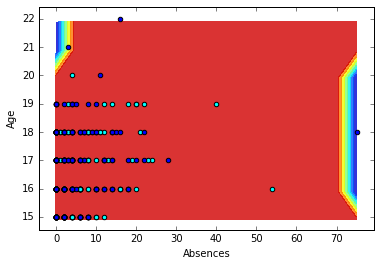

In [26]:
# SVM decision border
X = X_train.values
x = X_train.absences.values
y = X_train.age.values

h_x = 5
h_y = 1
dx = 0.1
dy = 0.1
x_min, x_max = x.min()-dx, x.max()+dx
y_min, y_max = y.min()-dy, y.max()+dy
xx, yy = np.meshgrid(np.arange(x_min, x_max, h_x),
                     np.arange(y_min, y_max, h_y))

# np.arange() Returns evenly spaced values within a given interval
# xx varies by axis = 1
# yy varies by axis = 0
#(x=absences, age=y)

# Now you need to create input vectors for all other values in X_train
# I will create inputs which are either = average or most popular in case
# the variable is digital
df = X_train.copy()

for col in df.columns:
    if df[col].dtype != object:
        u = df[col].unique()
        if len(u)>2:
            df[col] = df[col].mean()
        elif len(u)==2:
            if len(df[col]==u[0]) > len(df[col]==u[1]):
                df[col] = u[0]
            else:
                df[col] = u[1]

nS = xx.ravel().shape[0]
X_train_avg = DataFrame(np.tile(df.ix[0,:], [nS, 1]), columns=X_train.columns)

X_train_avg['age'] = yy.ravel()
X_train_avg['absences'] = xx.ravel()

from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train.replace(['yes', 'no'], [1, 0]))
y_tmp = clf.predict(X_train_avg)

y_tmp = y_tmp.reshape(xx.shape)
pl.contourf(xx, yy, y_tmp, alpha=0.8)

ixY = y_tgt==1
ixN = y_tgt==0
pl.scatter(X_train.ix[ixY, 'absences'], X_train.ix[ixY, 'age'], c=[0, 1, 1])
pl.scatter(X_train.ix[ixN, 'absences'], X_train.ix[ixN, 'age'], c=[0, 0, 1])
pl.xlabel('Absences')
pl.ylabel('Age')

